# Probability

## Objectives

* Probability, definitions and concepts
* Combinatorics, definitions and concepts
* Know how to reason about random variables
* Be able to choose probability distributions to model things appropriate

# Probability defintions

## Sets
The range of all possible outcomes or events, also called the sample space.
 * Coin flips
 * Cookies
 * Heights
 * Number of slices of pizza eaten before 10 am
 


## Set Operations

Union: $ A \cup B = \{x: x \in A \vee x\in B\}$

Intersection: $ A \cap B = \{x: x \in A \wedge x\in B\}$

Difference: $ A \setminus B = \{x: x \in A \wedge x \notin B\}$

Complement: $ A^C = \{x: x\notin A\} $

The null (empty) set: $ \emptyset $

### DeMorgan's Law

$ \neg (A \vee B) \iff \neg A \wedge \neg B $

$ \neg (A \wedge B) \iff \neg A \vee \neg B $

# Combinatorics

The mathematics of ordering, choosing sets, etc. Useful for counting events in your sample space.

## Factorial
If there are 10 lottery balls and we want draw them all, how many possible orderings are there?

## Combinations
Number of ways to choose things when order doesn't matter

How many different pairs are there for afternoons sprints with 24 students?

## Permutations
Number of ways to choose things when order does matter.

On a baseball team with 20 players, how many different batting orders are there?

# Probability

So far we only have a notion of sets, not of probability, what assumption do we rely on when we do basic set-based calculations, like cards?

What're examples of some sets where this assumption might be unjustifiable?

# Formal Probability

For some sample space $S$, a probability function $P$ has three properties:

$ P(A) \ge 0 \forall A \in S $

$ P(S) = 1 $

$ \forall A_i, A_j : A_i \cap A_j = \emptyset \Rightarrow P(A_i \cup A_j) = P(A_i) + P(A_j) $


# Independence

Events are independent (notation $ A\bot B$) if:

$$
P(A\cap B) = P(A)P(B)
$$

Or, equivalently

$$
P(A|B) = P(A)
$$

The above is known as _conditional_ probability.

## Check understanding
* How could we use the definition of independence to test whether two events are independent?
* What does knowing that B has occurred tell us about the likelihood of A?
 * Under independence?
 * Without independence?

# Urns

> Bernoulli used the Latin word urna, which primarily means a clay vessel, but is also the term used in ancient Rome for a vessel of any kind for collecting ballots or lots; the present-day Italian word for ballot box is still urna. Bernoulli's inspiration may have been lotteries, elections, or games of chance which involved drawing balls from a container

![Urn](http://i.dailymail.co.uk/i/pix/2015/01/29/article-urn:publicid:ap.org:fdadbd9d25a243bf92584d7b33ed6c20-6VwuLK88NHSK2-758_634x422.jpg)


# A problem

Three coins are in an Urn, HH, HT, and TT.

Pull out a coin and flip it. It comes up H.

What is the probability it comes out H if you flip it a second time?

# Solution

$ P(X_1 = H) = 1/2 $

$ P(X_2 = H | X_1 = H) = \frac{5}{6} \ne \frac{1}{2} = P(X_2=H) $

# Conditional probability

$ P(B|A) = P(A \cap B) / P(A) $

in other words

$ P(X_2=H | X_1=H) = P(X_2 = H \cap X_1 = H) / P(X_1=H) = \frac{\frac{1}{3} + \frac{1}{3}\frac{1}{4}}{\frac{1}{2}}$


In [1]:
import random
import pandas as pd
coins = ['HH', 'HT', 'TT']
results = []
for i in range(10000):
    coin = random.choice(coins)
    results.append([random.choice(coin) for i in [1,2]])
df = pd.DataFrame(results, columns=['first', 'second']) == 'H'
df.groupby('first').mean()


,second
first,
False,0.163423
True,0.827357


# Probability Chain Rule

Under independence?

$ P(X_1, X_2, X_3) = ? $

Not under independence?

$ P(X_1|X_2, X_3) P(X_2|X_3) P(X_3) $

More generally:

$ P(\cap_{i}^nX_i) = \prod_i^n P(X_i | \cap_k^{i-1} X_k) $

# Law of Total Probability

If $\{B_n\}$ is a partition of a sample space $ A $, meaning $ \cup_i B_i = A$ and $B_i \cap B_j=\emptyset \forall i, j$

Then 

$ P(A) = \sum P(A\cap B_i) $

or

$ P(A) = \sum P(A|B_i) P(B_i)$

And we call A the marginal distribution of B

# A Famous Rule and a Famously Counterintuitive Example

## Bayes Rule
Allows us to compute $P(B|A)$ using information about $P(A|B)$

$$
P(B|A) = \frac{P(A|B)P(B)}{P(A)}
$$

## Example
|Conditional Events | Probability |
| --------- | ----------- |
| $ P(+&#124;doped)$ | .99 |
| $ P(+&#124;clean)$ | .05 |
| $P(doped)$ | .005 |

What is $ P(doped | +) $?

What would help with this?

![](http://usercontent2.hubimg.com/3821609_f520.jpg)

# Random Variables

Random variables formalize a mapping we have been implicitly using already:

$ X(s) : S\Rightarrow \Re $

* Capital letters refer to random variables.
* Lowercase to refer to specific realization.
* $P(X=x) = P(\{s\in S : X(s) = x\})$ 
* $ X \sim XYZ(\alpha, \beta, ...) $ means X is distributed as, XYZ with parameters.
* "i.i.d."

# Cumulative distribution function

$ F_X(x) = P(X < x) $

What kinds of bounds can we put on this function?

This works for both continuous and discrete functions.

# Probability mass function, PMF

For discrete variables:

$ f_X(x) = P(X = x), \forall x $

For continuous variables, think of it as the derivative of the CDF:

$ f_X(x)dx = P(x < X < x+dx) $

$ f_X(x) = \frac{dF_X(x)}{dx} $

# Expectation
Discrete:
$ E[X] = \sum_{s\in S} X(s) f_X(s) $

Continuous:
$ E[X] = \int_{-\infty}^{\infty}X(s) f_X(s)ds$

A measure, but not the only one, of the central tendecy of a distribution. Alternatives?

Note, the sample mean is:

$ \bar{x} = \frac{1}{n}\sum_j^n x_j $

# Variance

$ Var[x] = E[(x - E[X])^2] $

What are the units?

Note, the sample variance is:

$ s^2 = \frac{1}{n-1} \sum_j^n (x_j - \bar{x})^2 $

# Standard deviation

$ \sigma(x) = \sqrt{Var[x]} $

Useful because its units are in units of our original RV.


# Covariance
We can also compute the covariance between two different variables:

$Cov[X,Y] = E[(x - E[X])(y - E[Y])]$

Which is related to the

# Correlation

$ Corr[X,Y] = \frac{E[(x - E[X])(y - E[Y])]}{\sigma(X)\sigma(Y)} = \frac{Cov[X,Y]}{\sigma(X)\sigma(Y)}$ 

# Marginal Distributions

Marginal distribution takes a--possibly not independent--multivariate distribution. And considers only a single dimension.

Accomplished by summing (discrete) or integrating (continuous).

$$
f_X(x) = \int_{-\infty}^\infty f_{XY}(x,s) ds
$$

# Example:

![](https://upload.wikimedia.org/wikipedia/commons/8/8e/MultivariateNormal.png)

# Discrete case:
|x1|x2|	x3|	x4|	py(Y)
--|--|--|--|--
y1|$\frac{4}{32}$|$\frac{2}{32}$|$\frac{1}{32}$|$\frac{1}{32}$|$\frac{8}{32}$
y2|$\frac{2}{32}$|$\frac{4}{32}$|$\frac{1}{32}$|$\frac{1}{32}$|$\frac{8}{32}$
y3|$\frac{2}{32}$|$\frac{2}{32}$|$\frac{2}{32}$|$\frac{2}{32}$|$\frac{8}{32}$
y4|$\frac{8}{32}$|0|0|0|$\frac{8}{32}$
px(X)|?|?|?|?|?

# Conditional Distributions

$$
f(y|x) = \frac{f_{XY}(x,y)}{f_X(x)}
$$

How would we relate that to the images we just saw?

Why might this type of conditional probability be important in data science?

# Anscombe's quartet

In [1]:
from numpy import array, amin, amax
%pylab inline

def fit(x):
    return 3+0.5*x

def anscombe():
    x =  array([10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5])
    y1 = array([8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68])
    y2 = array([9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74])
    y3 = array([7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73])
    x4 = array([8,8,8,8,8,8,8,19,8,8,8])
    y4 = array([6.58,5.76,7.71,8.84,8.47,7.04,5.25,12.50,5.56,7.91,6.89])
    xfit = array( [amin(x), amax(x) ] )
    figure(figsize(12,8))
    subplot(221)
    plot(x,y1,'ks', xfit, fit(xfit), 'r-', lw=2)
    axis([2,20,2,14])
    setp(gca(), xticklabels=[], yticks=(4,8,12), xticks=(0,10,20))
    text(3,12, 'I', fontsize=20)

    subplot(222)
    plot(x,y2,'ks', xfit, fit(xfit), 'r-', lw=2)
    axis([2,20,2,14])
    setp(gca(), xticklabels=[], yticks=(4,8,12), yticklabels=[], xticks=(0,10,20))
    text(3,12, 'II', fontsize=20)

    subplot(223)
    plot(x,y3,'ks', xfit, fit(xfit), 'r-', lw=2)
    axis([2,20,2,14])
    text(3,12, 'III', fontsize=20)
    setp(gca(), yticks=(4,8,12), xticks=(0,10,20))

    subplot(224)

    xfit = array([amin(x4),amax(x4)])
    plot(x4,y4,'ks', xfit, fit(xfit), 'r-', lw=2)
    axis([2,20,2,14])
    setp(gca(), yticklabels=[], yticks=(4,8,12), xticks=(0,10,20))
    text(3,12, 'IV', fontsize=20)

    #verify the stats
    pairs = (x,y1), (x,y2), (x,y3), (x4,y4)
    for x,y in pairs:
        print ('mean=%1.2f, std=%1.2f, r=%1.2f'%(mean(y), std(y), corrcoef(x,y)[0][1]))

Populating the interactive namespace from numpy and matplotlib


mean=7.50, std=1.94, r=0.82
mean=7.50, std=1.94, r=0.82
mean=7.50, std=1.94, r=0.82
mean=7.50, std=1.94, r=0.82


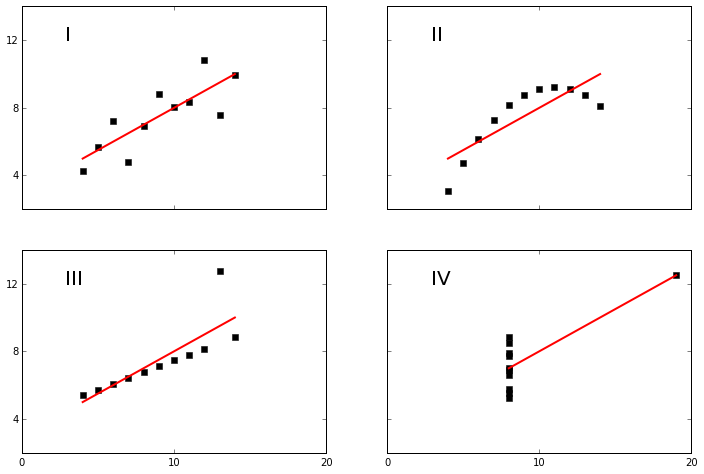

In [21]:
anscombe()

# Correlation
Captures:
 * Direction
 * ...
 
Doesn't Capture:
 * ...
<img src="https://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg" width=800 />

# Distributions

Rules for choosing a good distribution:

* Is data discrete or continuous?
* Is data symmetric?
* What limits are there on possible values for the data?
* How likely are extreme values?

# Bernoulli:

PMF = $P[success] = p$ , $ P[failure] = 1-p $

Mean: $ E[x] = p $

Variance: $ Var(x) = p(1-p) $

# Binomial:
PMF: $P[X=k] = {n \choose k}p^k(1-p)^{n-k}, \forall k \in \{0, 1,..., n\} $

Mean: $np$

Var: $np(1-p)$


# Geometric:
PMF: $ P[X=k] = p (1-p)^{k-1}, \forall k \in \{0, 1,...\}$

Mean: $ \frac{1}{p} $

Variance: $ \frac{1-p}{p^2} $

# Poisson

PMF: $P[X=k] = \frac{\lambda^k e^{-\lambda}}{k!},\forall k \in \{0,1,2,...\}$

Mean: $\lambda $

Variance: $ \lambda $

# Uniform

PDF: $ f(x) = \frac{1}{b-a}, \forall x\in[a, b], $ $0$ otherwise

Mean: $ \frac{a+b}{2} $

Variance: $ \frac{(b-a)^2}{2}$

# Exponential

CDF: $ P[T < t] = 1 - exp(\lambda t), x \ge 0, \lambda \ge 0 $

Mean: $ \frac{1}{\lambda} $

Variance: $ \frac{1}{\lambda^2} $

# Normal aka Gaussian

PDF: $\frac{1}{\sqrt{2\pi\sigma^2}}exp(-\frac{(x - \mu)^2}{2\sigma^2}) $

Mean: $\mu$

Variance: $ \sigma^2 $

## Central Limit Theorem Tomorrow

Will show Normal distribution, is _profoundly_ important distribution.